In [150]:
from IPython.display import HTML
file_path = 'homework3_part1_images/ex1_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [151]:
from IPython.display import HTML
file_path = 'homework3_part1_images/GD_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [152]:
import numpy as np 
import matplotlib.pyplot as plt

In [153]:
def gradient_descent_fixalpha(f,grad_f,x0,kmax,tolf,tolx,alpha):

    if alpha <= 0:
        raise ValueError("Alpha must be greater than 0")
        
    x = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err = [np.linalg.norm(grads[0])]

    for i in range(kmax):
        # Calculate the new point
        x_new = x[-1] - alpha * grads[-1]

        # Update the lists with new values
        x.append(x_new)
        f_val.append(f(x_new))
        grads.append(grad_f(x_new))
        err.append(np.linalg.norm(grad_f(x_new)))

        # Check the convergence conditions
        if (np.linalg.norm(grads[-1]) < tolf * np.linalg.norm(grads[0])) or (np.linalg.norm(x[-1] - x[-2]) < tolx * np.linalg.norm(x[0])):
            break
    
    return x, i, f_val, grads, err


In [154]:
def backtracking(f, grad_f, x):
    '''
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    '''
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha 

In [155]:
from IPython.display import HTML
file_path = 'homework3_part1_images/Back_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [156]:
def gradient_descent(f,grad_f,x0,kmax,tolf,tolx):
    
    x = [x0]
    f_val = [f(x0)]
    grads = [grad_f(x0)]
    err = [np.linalg.norm(grads[0])]

    for i in range(kmax):
        # Determine step size using backtracking
        alpha = backtracking(f,grad_f,x[-1])

        # Calculate the new point
        x_new = x[-1] - alpha * grads[-1]

        # Update the lists with new values
        x.append(x_new)
        f_val.append(f(x_new))
        grads.append(grad_f(x_new))
        err.append(np.linalg.norm(grad_f(x_new)))

        # Check the convergence conditions
        if (np.linalg.norm(grads[-1]) < tolf * np.linalg.norm(grads[0])) or (np.linalg.norm(x[-1] - x[-2]) < tolx * np.linalg.norm(x[0])):
            break
    
    return x, i, f_val, grads, err

In [157]:
from IPython.display import HTML
file_path = 'homework3_part1_images/test_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

In [158]:
from IPython.display import HTML
file_path = 'homework3_part1_images/requests_home3.png'
html_code = f'<div style="text-align: center;"><img src="{file_path}"></div>'
HTML(html_code)

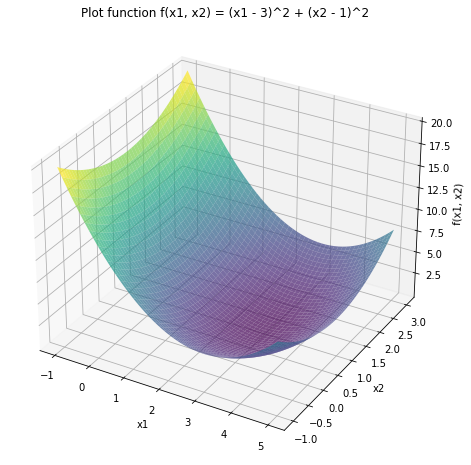

In [159]:
# 1 function
def f(x):
    x1,x2 = x
    return (x1 - 3)**2 + (x2 - 1)**2

def grad_f(x):
    x1,x2 = x
    return np.array([2 * (x1 - 3), 2 * (x2 - 1)])


x1 = np.linspace(-1, 5, 400) 
x2 = np.linspace(-1, 3, 400)   

x = [x1,x2]
x1, x2 = np.meshgrid(x1, x2) 
z = f(np.array([x1, x2]))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='viridis', alpha=0.7)  

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Plot function f(x1, x2) = (x1 - 3)^2 + (x2 - 1)^2')
plt.show()

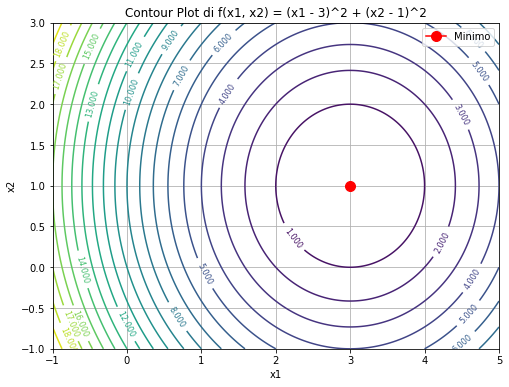

In [160]:
plt.figure(figsize=(8, 6))
contours = plt.contour(x1, x2, z, 20, cmap='viridis')
plt.clabel(contours,fontsize=8)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot di f(x1, x2) = (x1 - 3)^2 + (x2 - 1)^2')
plt.grid(True)

minimo_x1 = 3
minimo_x2 = 1
plt.plot(minimo_x1, minimo_x2, marker='o', color='red', markersize=10, label='Minimo')
plt.legend()
plt.show()

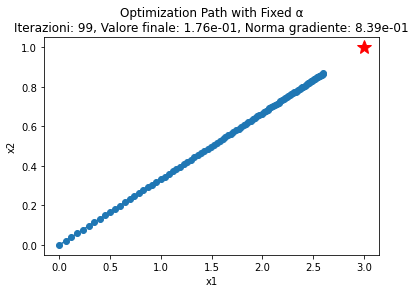

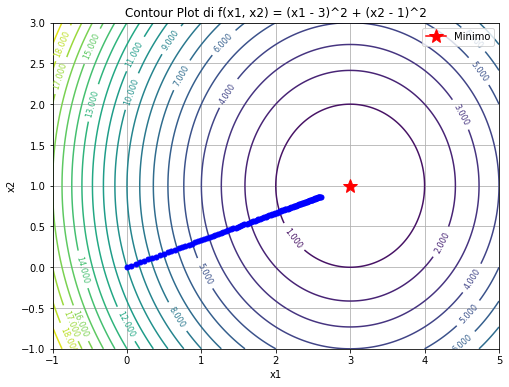

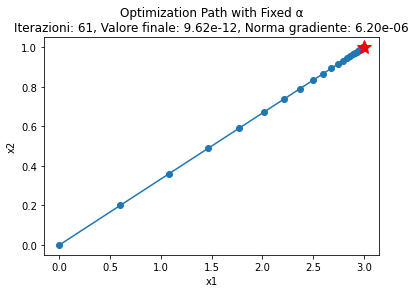

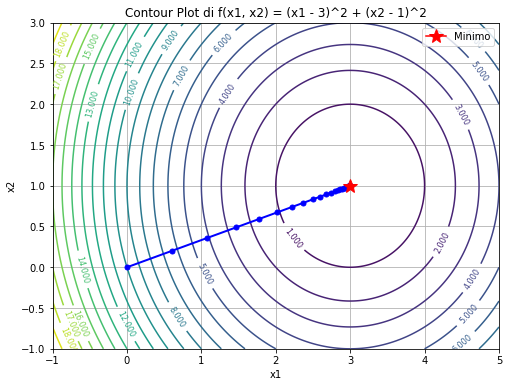

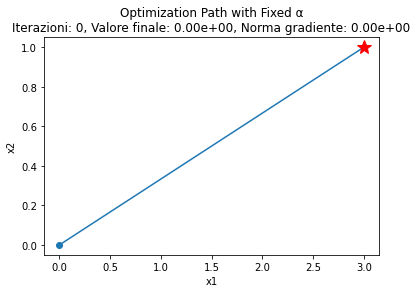

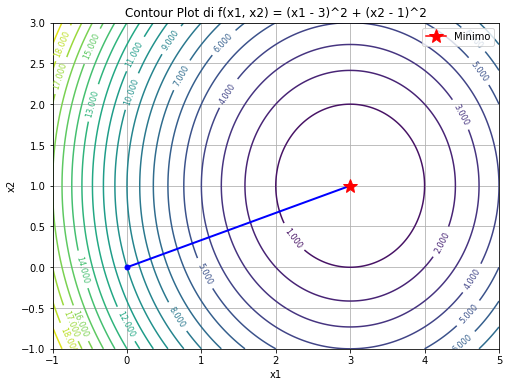

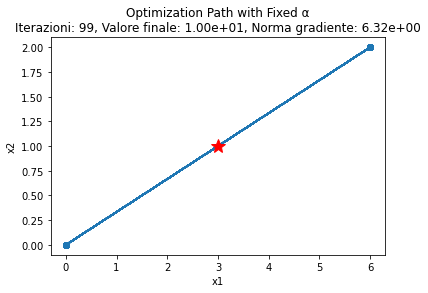

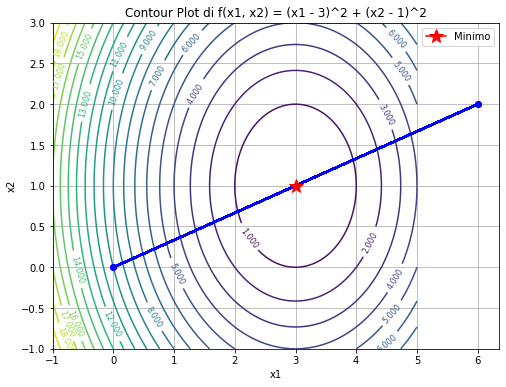

In [161]:
x0 = np.array([0.0, 0.0]) 
kmax = 100  
tolf = 1e-6  
tolx = 1e-6  
alphas = [0.01, 0.1, 0.5, 1.0]  
minimo_x1 = 3
minimo_x2 = 1

results_nobacktracking = {}
for alpha in alphas:
    results_nobacktracking[alpha] = gradient_descent_fixalpha(f, grad_f, x0, kmax, tolf, tolx, alpha)

# print(results_nobacktracking)


def plot_optimization_path(x_history, title, num_iterations, final_func_value, final_grad_norm):
    x_vals = [x[0] for x in x_history]
    y_vals = [x[1] for x in x_history]

    plt.plot(x_vals, y_vals, marker='o')
    plt.plot(3, 1, 'r*', markersize=15)  
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f"{title}\nIterazioni: {num_iterations}, Valore finale: {final_func_value:.2e}, Norma gradiente: {final_grad_norm:.2e}")
    plt.show()


def plot_contour(x1, x2, z, path):
    plt.figure(figsize=(8, 6))
    contours = plt.contour(x1, x2, z, 20, cmap='viridis') 
    x1 = [x[0] for x in path]
    x2 = [x[1] for x in path]
    plt.clabel(contours, fontsize=8)
    plt.plot(x1, x2, marker='o', color='blue', linestyle='-', linewidth=2, markersize=5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot di f(x1, x2) = (x1 - 3)^2 + (x2 - 1)^2')
    plt.grid(True)
    plt.plot(minimo_x1, minimo_x2, marker='*', color='red', markersize=15, label='Minimo')
    plt.legend()
    plt.show()


def plot_results(path, num_iterations, f_val, grads, x1, x2, z, alpha=None, method="Fixed α"):
    final_point = path[-1]
    final_f_value = f_val[-1]
    final_grad_norm = np.linalg.norm(grads[-1])
    
    title = f"Optimization Path with {method}"

    plot_optimization_path(path, title, num_iterations, final_f_value, final_grad_norm)
    plot_contour(x1, x2, z, path)


for alpha, result in results_nobacktracking.items():
    path, num_iterations, f_val, grads, err = result
    plot_results(path, num_iterations, f_val, grads, x1, x2, z, alpha, method="Fixed α")


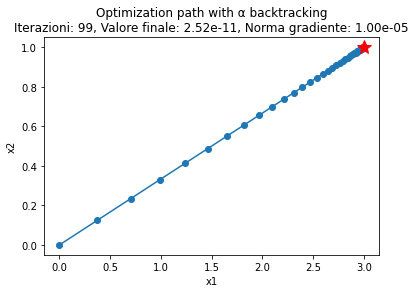

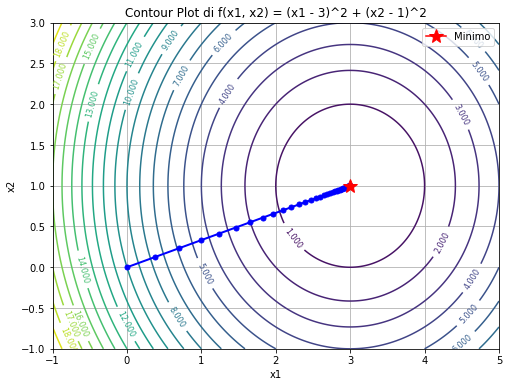

In [162]:
x0 = np.array([0.0, 0.0]) 
kmax = 100  
tolf = 1e-6  
tolx = 1e-6 

path, num_iterations, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx)

#print(results_backtracking)

final_point = path[-1]
final_func_value = f_val[-1]
final_grad_norm = np.linalg.norm(grads[-1])
plot_optimization_path(path, f"Optimization path with α backtracking", num_iterations, final_func_value, final_grad_norm)
plot_contour(x1, x2, z, path)
# plot_results(path, num_iterations, f_val, grads, x1, x2, z)

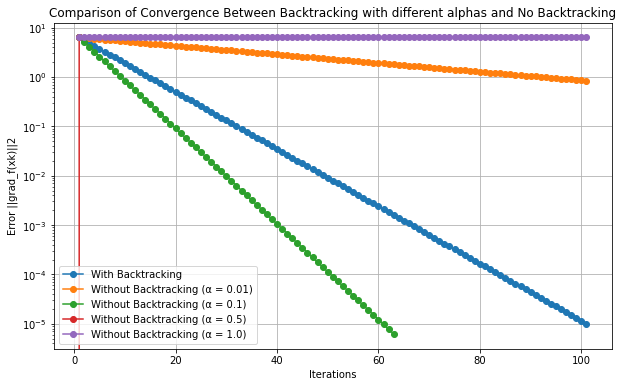

In [163]:
path, num_iterations, f_val, grads, err = gradient_descent(f, grad_f, x0, kmax, tolf, tolx)
k_backtracking = num_iterations
err_backtracking = err

k_nobacktracking = [results_nobacktracking[alpha][1] for alpha in alphas]
err_nobacktracking = [results_nobacktracking[alpha][-1] for alpha in alphas]


def plot_comparison(k_backtracking, err_backtracking, k_nobacktracking, err_nobacktracking, alphas):
    plt.figure(figsize=(10, 6))
    plt.semilogy(range(1, k_backtracking + 3), err_backtracking, label='With Backtracking', marker='o')
    
    for alpha, error in zip(alphas, err_nobacktracking):
        plt.semilogy(range(1, len(error) + 1), error, label=f'Without Backtracking (α = {alpha})', marker='o')

    plt.xlabel('Iterations')
    plt.ylabel('Error ||grad_f(xk)||2')
    plt.title('Comparison of Convergence Between Backtracking with different alphas and No Backtracking')
    plt.legend()
    plt.grid()
    plt.show()


plot_comparison(k_backtracking, err_backtracking, k_nobacktracking, err_nobacktracking, alphas)

tolf: 1e-06, tolx: 1e-06 -> Iterazioni: 103, Valore finale: 8.663133929057938e-12, Cambiamento in x: 4.2047431734906344e-07
tolf: 1e-06, tolx: 1e-08 -> Iterazioni: 103, Valore finale: 8.663133929057938e-12, Cambiamento in x: 4.2047431734906344e-07
tolf: 1e-06, tolx: 1e-10 -> Iterazioni: 103, Valore finale: 8.663133929057938e-12, Cambiamento in x: 4.2047431734906344e-07
tolf: 1e-08, tolx: 1e-06 -> Iterazioni: 137, Valore finale: 9.867852111454736e-16, Cambiamento in x: 4.487591330278101e-09
tolf: 1e-08, tolx: 1e-08 -> Iterazioni: 137, Valore finale: 9.867852111454736e-16, Cambiamento in x: 4.487591330278101e-09
tolf: 1e-08, tolx: 1e-10 -> Iterazioni: 137, Valore finale: 9.867852111454736e-16, Cambiamento in x: 4.487591330278101e-09
tolf: 1e-10, tolx: 1e-06 -> Iterazioni: 172, Valore finale: 8.605713131993931e-20, Cambiamento in x: 4.190808183950403e-11
tolf: 1e-10, tolx: 1e-08 -> Iterazioni: 172, Valore finale: 8.605713131993931e-20, Cambiamento in x: 4.190808183950403e-11
tolf: 1e-10, 

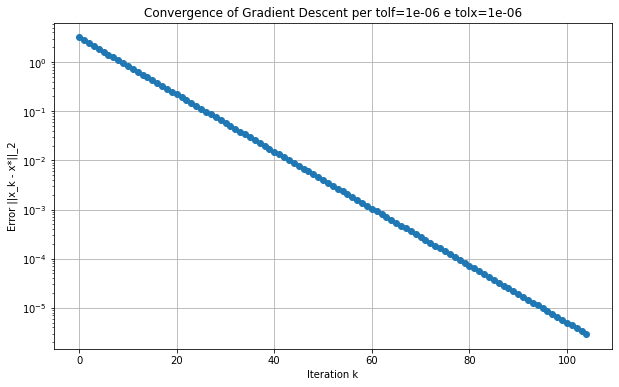

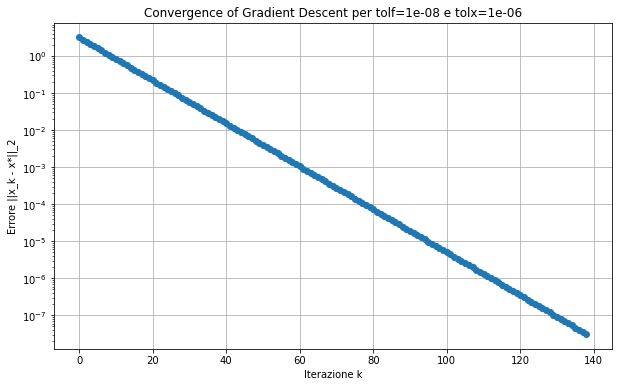

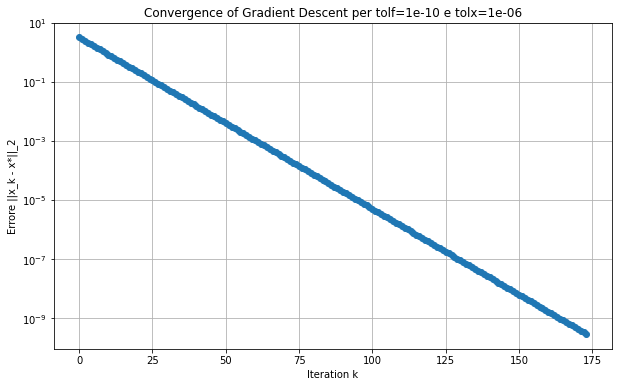

In [164]:
x_star = np.array([3, 1])

def find_optimal_tolerances_backtracking(f,grad_f,x0,kmax,tolf_values,tolx_values):
    res = {}
    for tolf in tolf_values:
        for tolx in tolx_values:
            x,k_iter,f_val,_,_ = gradient_descent(f, grad_f, x0, kmax, tolf, tolx)

            errors = [np.linalg.norm(x_k - x_star) for x_k in x]

            final_f_val = f_val[-1]
            last_x_change = x[-1] - x[-2]
            res[(tolf,tolx)] = (k_iter,final_f_val,last_x_change,errors)

    return res

x0 = np.array([0.0, 0.0])
kmax = 1000
tolf_values = [1e-6, 1e-8, 1e-10]
tolx_values = [1e-6, 1e-8, 1e-10]


optimal_tolerances = find_optimal_tolerances_backtracking(f, grad_f, x0, kmax, tolf_values, tolx_values)

for tol_values, info in optimal_tolerances.items():
    print(f"tolf: {tol_values[0]}, tolx: {tol_values[1]} -> Iterazioni: {info[0]}, Valore finale: {info[1]}, Cambiamento in x: {np.linalg.norm(info[2])}")


##############

tolf_to_plot = 1e-6
tolx_to_plot = 1e-6
errors_to_plot = optimal_tolerances[(tolf_to_plot, tolx_to_plot)][3]

plt.figure(figsize=(10, 6))
plt.plot(errors_to_plot, marker='o')
plt.yscale('log')  
plt.xlabel('Iteration k')
plt.ylabel('Error ||x_k - x*||_2')
plt.title(f'Convergence of Gradient Descent per tolf={tolf_to_plot} e tolx={tolx_to_plot}')
plt.grid(True)
plt.show()

###############

tolf_to_plot = 1e-8
tolx_to_plot = 1e-6
errors_to_plot = optimal_tolerances[(tolf_to_plot, tolx_to_plot)][3]

plt.figure(figsize=(10, 6))
plt.plot(errors_to_plot, marker='o')
plt.yscale('log')  
plt.xlabel('Iterazione k')
plt.ylabel('Errore ||x_k - x*||_2')
plt.title(f'Convergence of Gradient Descent per tolf={tolf_to_plot} e tolx={tolx_to_plot}')
plt.grid(True)
plt.show()

################

tolf_to_plot = 1e-10
tolx_to_plot = 1e-6
errors_to_plot = optimal_tolerances[(tolf_to_plot, tolx_to_plot)][3]

plt.figure(figsize=(10, 6))
plt.plot(errors_to_plot, marker='o')
plt.yscale('log')  
plt.xlabel('Iteration k')
plt.ylabel('Errore ||x_k - x*||_2')
plt.title(f'Convergence of Gradient Descent per tolf={tolf_to_plot} e tolx={tolx_to_plot}')
plt.grid(True)
plt.show()


In conducting an analysis of the gradient descent algorithm's performance with varying tolerances for the objective function (<b>tolf</b>) and decision variables (<b>tolx</b>), it was observed that the convergence of the algorithm is predominantly influenced by the tolerance on the objective function (tolf). 

Specifically, as tolf is tightened (lowered from 1e−6 to 1e−10), the precision of the solution notably increases, as evidenced by a significant reduction in the final objective function value. 
However, this increase in precision comes with a corresponding rise in the number of iterations, highlighting a classic trade-off between computational cost and solution accuracy. 

Notably, changes in tolx did not materially affect the number of iterations or the final value of the objective function, suggesting that the convergence criterion based on the gradient norm (tolf) is the primary determinant in the stopping condition of the algorithm under the tested scenarios.

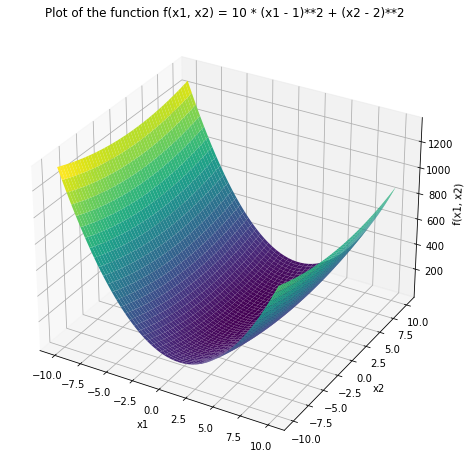

In [165]:
###############################################################
# 2 Function
def f2(x):
    x1,x2 = x
    return 10 * (x1 - 1)**2 + (x2 - 2)**2

def grad_f2(x):
    x1,x2 = x
    return np.array([20 * (x1 - 1),2 * (x2 - 2)])


x1 = np.linspace(-10,10,400)
x2 = np.linspace(-10,10,400)
x1,x2 = np.meshgrid(x1,x2)
x = [x1,x2]
z = f2(x)


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1, x2, z, cmap='viridis')

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1, x2)')
ax.set_title('Plot of the function f(x1, x2) = 10 * (x1 - 1)**2 + (x2 - 2)**2')
plt.show()

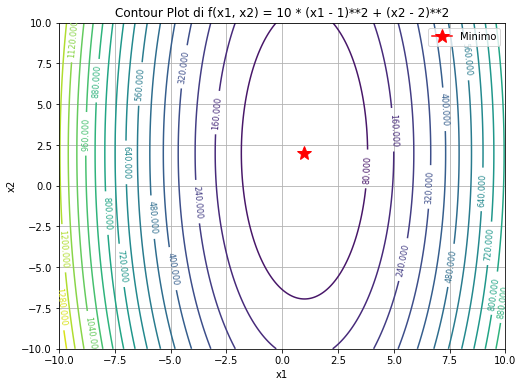

In [166]:
plt.figure(figsize=(8, 6))
contours = plt.contour(x1, x2, z, 20, cmap='viridis')  # 20 contours levels
plt.clabel(contours,fontsize=8)

# Etichette e titolo
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Contour Plot di f(x1, x2) = 10 * (x1 - 1)**2 + (x2 - 2)**2')
plt.grid(True)

minimo_x1 = 1
minimo_x2 = 2
plt.plot(minimo_x1, minimo_x2, marker='*', color='red', markersize=15, label='Minimo')
plt.legend()
plt.show()

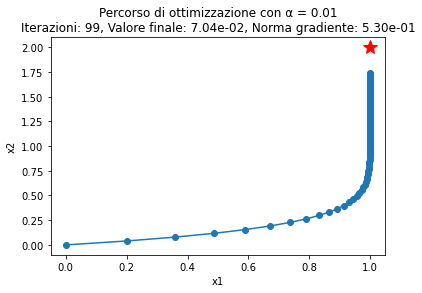

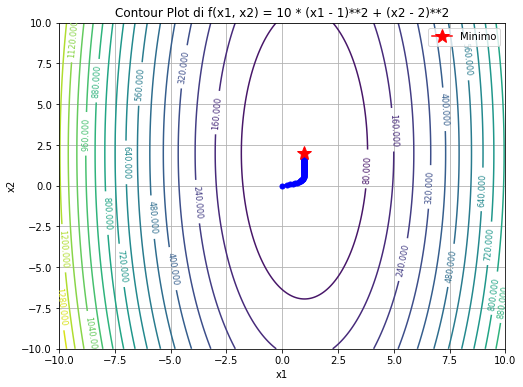

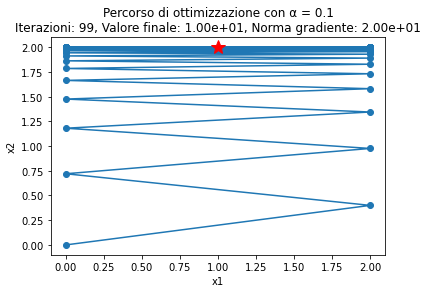

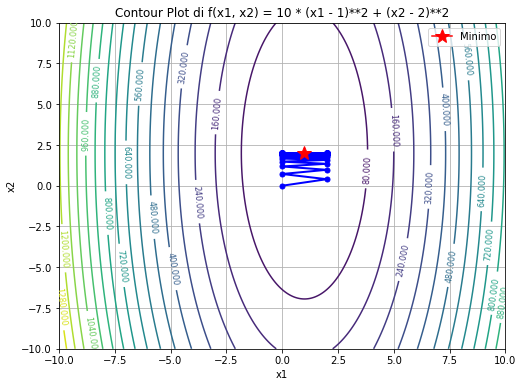

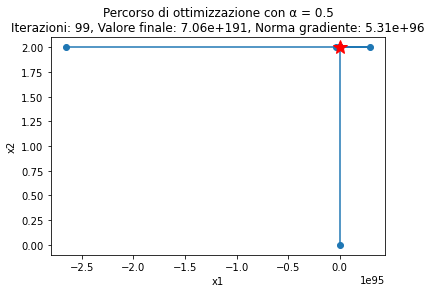

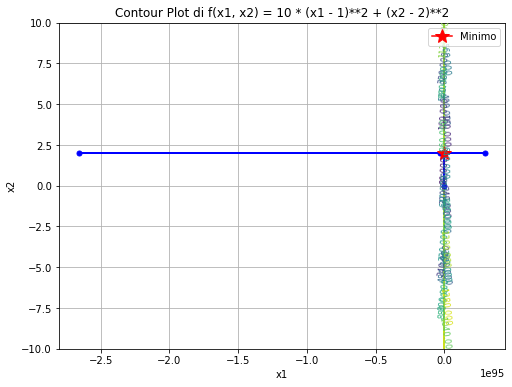

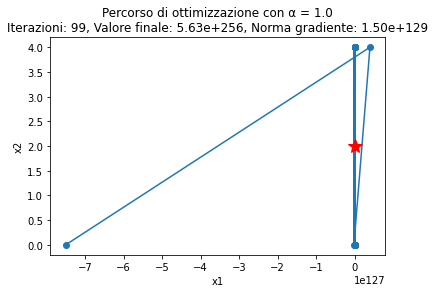

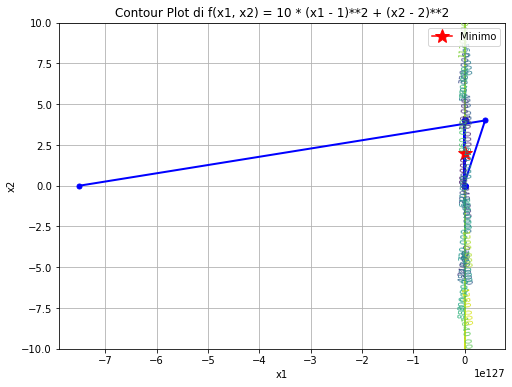

In [167]:
x0 = np.array([0.0, 0.0]) 
kmax = 100  
tolf = 1e-6  
tolx = 1e-6 
alphas = [0.01, 0.1, 0.5, 1.0] 

minimo_x1 = 1
minimo_x2 = 2

results_nobacktracking = {}
for alpha in alphas:
    results_nobacktracking[alpha] = gradient_descent_fixalpha(f2, grad_f2, x0, kmax, tolf, tolx, alpha)

# print(results_nobacktracking)


def plot_optimization_path(x_history, title, num_iterations, final_func_value, final_grad_norm):
    x_vals = [x[0] for x in x_history]
    y_vals = [x[1] for x in x_history]

    plt.plot(x_vals, y_vals, marker='o')
    plt.plot(1, 2, 'r*', markersize=15)  
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title(f"{title}\nIterazioni: {num_iterations}, Valore finale: {final_func_value:.2e}, Norma gradiente: {final_grad_norm:.2e}")

    plt.figure(figsize=(8, 6))
    contours = plt.contour(x1, x2, z, 20, cmap='viridis') 
    plt.clabel(contours,fontsize=8)

    x1_path = [x[0] for x in path]
    x2_path = [x[1] for x in path]

    plt.plot(x1_path,x2_path,marker='o',color='blue',linestyle='-',linewidth=2, markersize=5)

   
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('Contour Plot di f(x1, x2) = 10 * (x1 - 1)**2 + (x2 - 2)**2')
    plt.grid(True)
    plt.plot(minimo_x1, minimo_x2, marker='*', color='red', markersize=15, label='Minimo')
    plt.legend()

    plt.show()


for alpha, result in results_nobacktracking.items():
    path, num_iterations, f_val, grads, err = result
    final_point = path[-1]
    final_func_value = f_val[-1]
    final_grad_norm = np.linalg.norm(grads[-1])
    plot_optimization_path(path, f"Percorso di ottimizzazione con α = {alpha}", num_iterations, final_func_value, final_grad_norm)

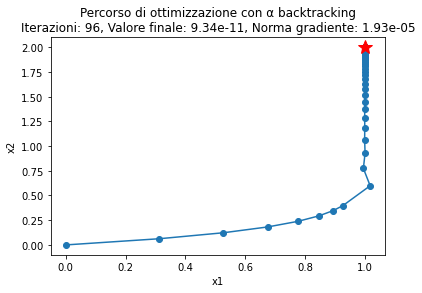

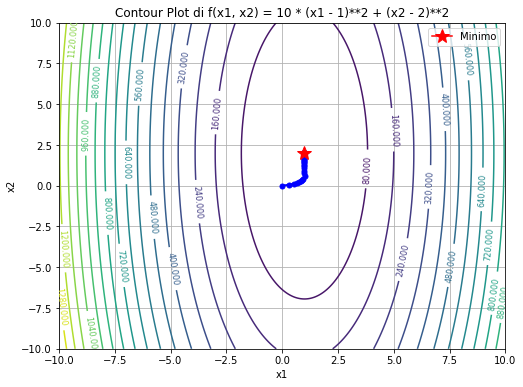

In [168]:
x0 = np.array([0.0, 0.0])  
kmax = 100  
tolf = 1e-6  
tolx = 1e-6 

path, num_iterations, f_val, grads, err = gradient_descent(f2, grad_f2, x0, kmax, tolf, tolx)

#print(results_backtracking)

final_point = path[-1]
final_func_value = f_val[-1]
final_grad_norm = np.linalg.norm(grads[-1])
plot_optimization_path(path, f"Percorso di ottimizzazione con α backtracking", num_iterations, final_func_value, final_grad_norm)

<ipython-input-169-f0ecf47c5d37>:14: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  plt.ylim(0, 1e10)  # delete this line to see the general effect


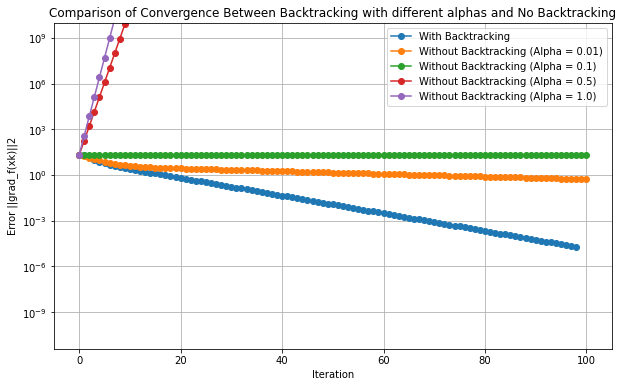

In [169]:
path, num_iterations, f_val, grads, err = gradient_descent(f2, grad_f2, x0, kmax, tolf, tolx)
k_backtracking = num_iterations
err_backtracking = err


k_nobacktracking = [results_nobacktracking[alpha][1] for alpha in alphas]
err_nobacktracking = [results_nobacktracking[alpha][-1] for alpha in alphas]

plt.figure(figsize=(10, 6))
plt.semilogy(range(1,k_backtracking+3), err_backtracking, label='With Backtracking', marker='o')
for alpha, error in zip(alphas, err_nobacktracking):
    plt.semilogy(range(len(error)), error, label=f'Without Backtracking (Alpha = {alpha})', marker='o')

plt.ylim(0, 1e10)  # delete this line to see the general effect 

plt.xlabel('Iteration')
plt.ylabel('Error ||grad_f(xk)||2')
plt.title('Comparison of Convergence Between Backtracking with different alphas and No Backtracking')
plt.legend()
plt.grid()
plt.show()

tolf: 1e-06, tolx: 1e-06 -> Iterazioni: 96, Valore finale: 9.342724716663181e-11, Cambiamento in x: 1.3808253016556193e-06
tolf: 1e-06, tolx: 1e-08 -> Iterazioni: 96, Valore finale: 9.342724716663181e-11, Cambiamento in x: 1.3808253016556193e-06
tolf: 1e-06, tolx: 1e-10 -> Iterazioni: 96, Valore finale: 9.342724716663181e-11, Cambiamento in x: 1.3808253016556193e-06
tolf: 1e-08, tolx: 1e-06 -> Iterazioni: 131, Valore finale: 8.147741909896392e-15, Cambiamento in x: 1.2894977530208962e-08
tolf: 1e-08, tolx: 1e-08 -> Iterazioni: 131, Valore finale: 8.147741909896392e-15, Cambiamento in x: 1.2894977530208962e-08
tolf: 1e-08, tolx: 1e-10 -> Iterazioni: 131, Valore finale: 8.147741909896392e-15, Cambiamento in x: 1.2894977530208962e-08
tolf: 1e-10, tolx: 1e-06 -> Iterazioni: 165, Valore finale: 9.280784314323266e-19, Cambiamento in x: 1.376241343109541e-10
tolf: 1e-10, tolx: 1e-08 -> Iterazioni: 165, Valore finale: 9.280784314323266e-19, Cambiamento in x: 1.376241343109541e-10
tolf: 1e-10, 

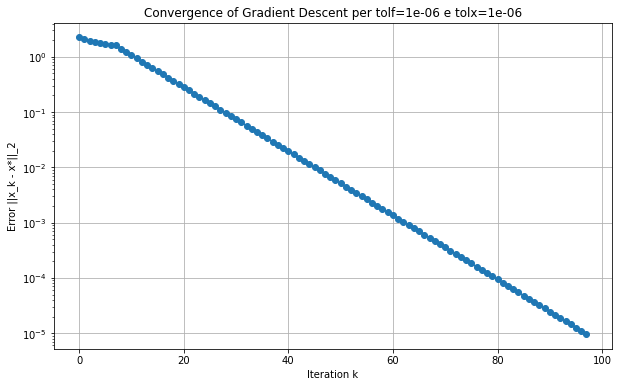

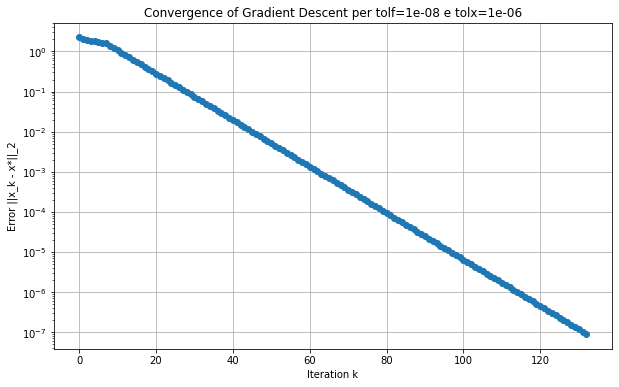

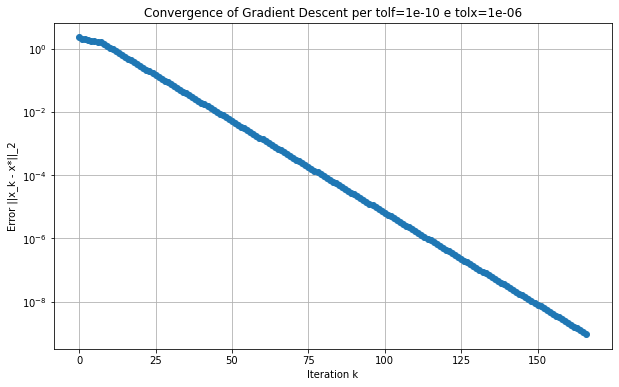

In [170]:
x_star = np.array([1, 2])

x0 = np.array([0.0, 0.0])
kmax = 1000
tolf_values = [1e-6, 1e-8, 1e-10]
tolx_values = [1e-6, 1e-8, 1e-10]


optimal_tolerances = find_optimal_tolerances_backtracking(f2, grad_f2, x0, kmax, tolf_values, tolx_values)

for tol_values, info in optimal_tolerances.items():
    print(f"tolf: {tol_values[0]}, tolx: {tol_values[1]} -> Iterazioni: {info[0]}, Valore finale: {info[1]}, Cambiamento in x: {np.linalg.norm(info[2])}")


##############

tolf_to_plot = 1e-6
tolx_to_plot = 1e-6
errors_to_plot = optimal_tolerances[(tolf_to_plot, tolx_to_plot)][3]

plt.figure(figsize=(10, 6))
plt.plot(errors_to_plot, marker='o')
plt.yscale('log')  
plt.xlabel('Iteration k')
plt.ylabel('Error ||x_k - x*||_2')
plt.title(f'Convergence of Gradient Descent per tolf={tolf_to_plot} e tolx={tolx_to_plot}')
plt.grid(True)
plt.show()

###############

tolf_to_plot = 1e-8
tolx_to_plot = 1e-6
errors_to_plot = optimal_tolerances[(tolf_to_plot, tolx_to_plot)][3]

plt.figure(figsize=(10, 6))
plt.plot(errors_to_plot, marker='o')
plt.yscale('log')  
plt.xlabel('Iteration k')
plt.ylabel('Error ||x_k - x*||_2')
plt.title(f'Convergence of Gradient Descent per tolf={tolf_to_plot} e tolx={tolx_to_plot}')
plt.grid(True)
plt.show()

################

tolf_to_plot = 1e-10
tolx_to_plot = 1e-6
errors_to_plot = optimal_tolerances[(tolf_to_plot, tolx_to_plot)][3]

plt.figure(figsize=(10, 6))
plt.plot(errors_to_plot, marker='o')
plt.yscale('log') 
plt.xlabel('Iteration k')
plt.ylabel('Error ||x_k - x*||_2')
plt.title(f'Convergence of Gradient Descent per tolf={tolf_to_plot} e tolx={tolx_to_plot}')
plt.grid(True)
plt.show()

In [171]:
# 3 function

def generate_vandermonde_matrix(n):
    v = np.linspace(0, 1, n)
    return np.vander(v, n, increasing=True)

n = 5
A = generate_vandermonde_matrix(n)
x_true = np.ones(n)
b = A @ x_true

def f3(x):
    return 0.5 * np.linalg.norm(A @ x - b) ** 2

def grad_f3(x):
    return A.T @ (A @ x - b)

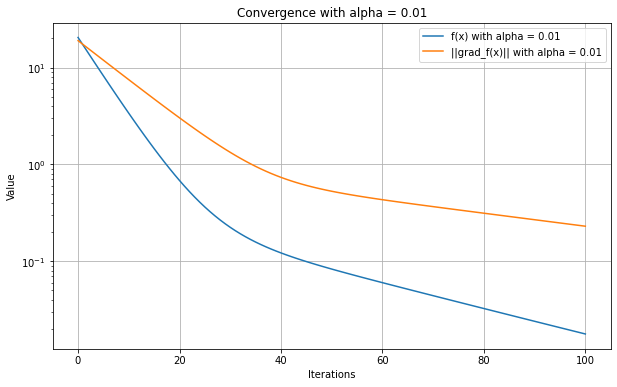

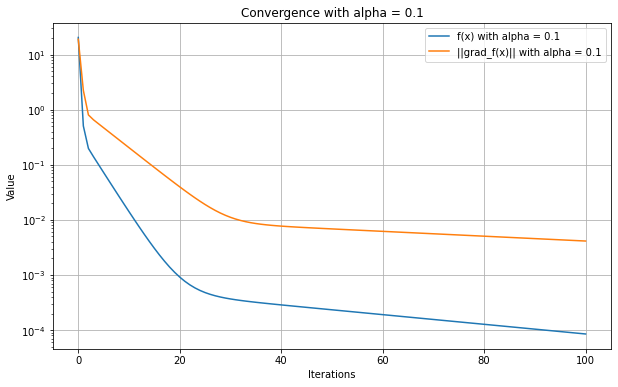

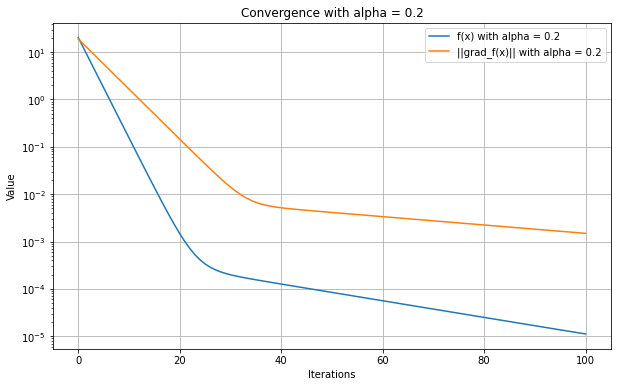

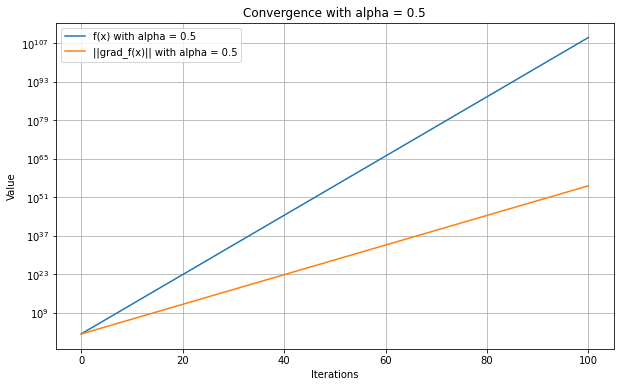

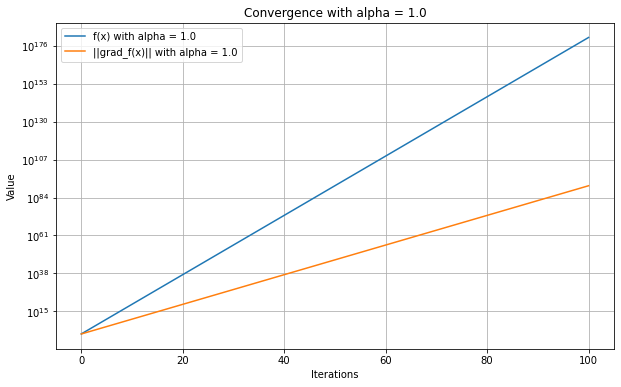

In [172]:
x0 = np.zeros(n)  
kmax = 100  
tolf = 1e-6 
tolx = 1e-6  
alphas = [0.01, 0.1,0.2,0.5, 1.0]  


results_nobacktracking = {}
for alpha in alphas:
    results_nobacktracking[alpha] = gradient_descent_fixalpha(f3, grad_f3, x0, kmax, tolf, tolx, alpha)

for alpha, result in results_nobacktracking.items():
    path, num_iterations, f_val, grads, err = result
    final_func_value = f_val[-1]
    final_grad_norm = np.linalg.norm(grads[-1])

    plt.figure(figsize=(10, 6))
    plt.semilogy(f_val, label=f'f(x) with alpha = {alpha}')
    plt.semilogy(err, label=f'||grad_f(x)|| with alpha = {alpha}')
    plt.xlabel('Iterations')
    plt.ylabel('Value')
    plt.title(f'Convergence with alpha = {alpha}')
    plt.legend()
    plt.grid(True)
    plt.show()

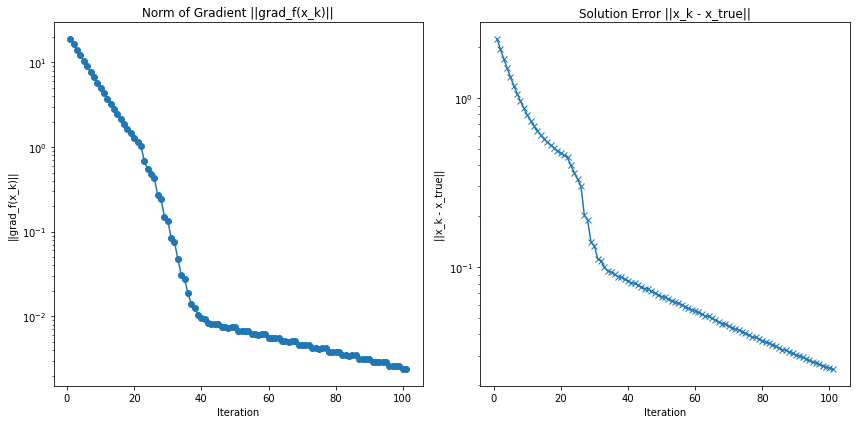

In [173]:
x0 = np.zeros(n)  
kmax = 100
tolf = 1e-6 
tolx = 1e-6  
path, num_iterations, f_val, grads, err = gradient_descent(f3, grad_f3, x0, kmax, tolf, tolx)
solution_errors = [np.linalg.norm(x_k - x_true) for x_k in path]


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.semilogy(range(1, len(grads) + 1), err, marker='o')
plt.title('Norm of Gradient ||grad_f(x_k)||')
plt.xlabel('Iteration')
plt.ylabel('||grad_f(x_k)||')

plt.subplot(1, 2, 2)
plt.semilogy(range(1, len(solution_errors) + 1), solution_errors, marker='x')
plt.title('Solution Error ||x_k - x_true||')
plt.xlabel('Iteration')
plt.ylabel('||x_k - x_true||')

plt.tight_layout()
plt.show()


#The similar trend in the convergence graphs reflects the direct relationship between a quadratic function's value and its gradient norm.

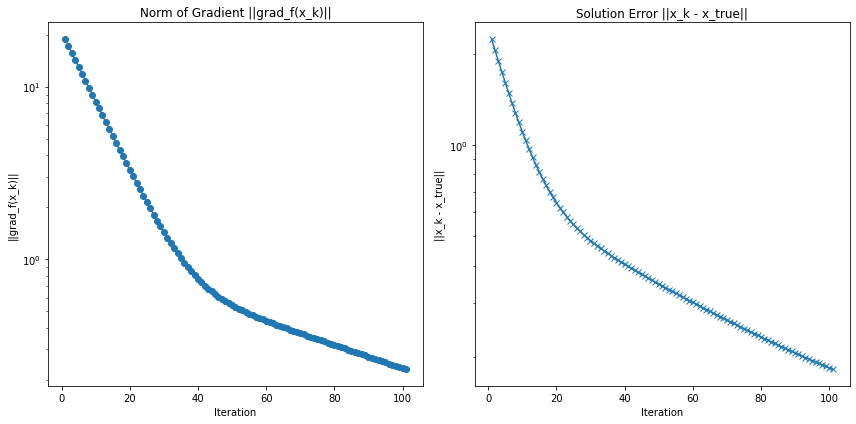

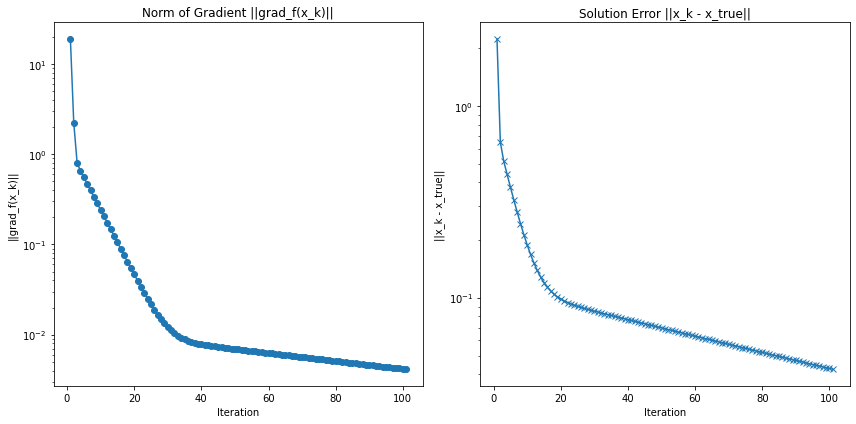

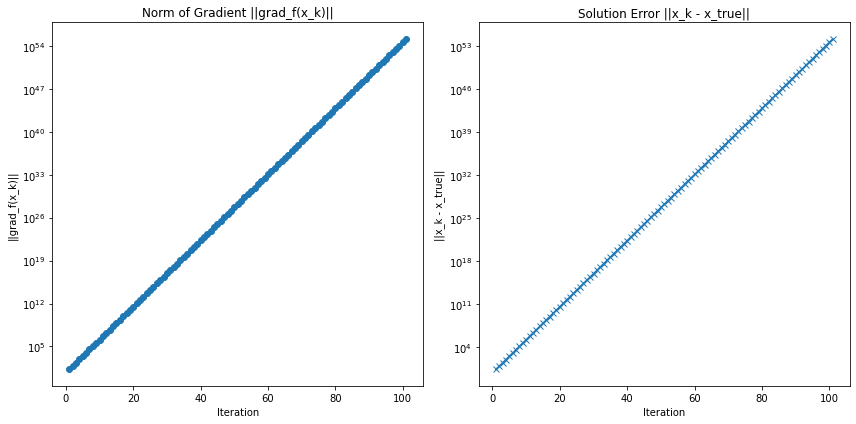

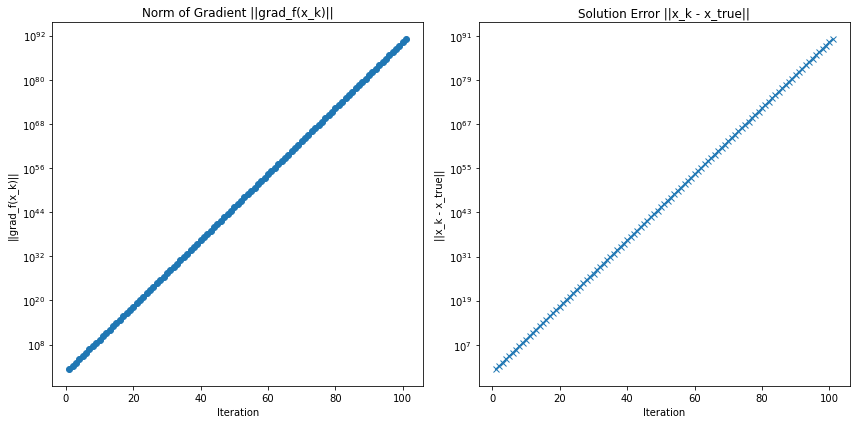

In [176]:
n = 5
A = generate_vandermonde_matrix(n)
x_true = np.ones(n)
b = A @ x_true
x0 = np.zeros(n)
kmax = 100
tolf = 1e-6
tolx = 1e-6
alphas = [0.01, 0.1, 0.5, 1.0]

results_nobacktracking = {}
for alpha in alphas:
    results_nobacktracking[alpha] = gradient_descent_fixalpha(f3, grad_f3, x0, kmax, tolf, tolx, alpha)

for alpha, result in results_nobacktracking.items():
    path, num_iterations, f_val, grads, err = result
    solution_errors = [np.linalg.norm(x_k - x_true) for x_k in path]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.semilogy(range(1, len(grads) + 1), err, marker='o')
    plt.title('Norm of Gradient ||grad_f(x_k)||')
    plt.xlabel('Iteration')
    plt.ylabel('||grad_f(x_k)||')

    plt.subplot(1, 2, 2)
    plt.semilogy(range(1, len(solution_errors) + 1), solution_errors, marker='x')
    plt.title('Solution Error ||x_k - x_true||')
    plt.xlabel('Iteration')
    plt.ylabel('||x_k - x_true||')

    plt.tight_layout()
    plt.show()

In [177]:
# 4 function 
def f4(x, A, b, lam):
    return 0.5 * np.linalg.norm(A @ x - b)**2 + (lam / 2) * np.linalg.norm(x)**2

def grad_f4(x, A, b, lam):
    return A.T @ (A @ x - b) + lam * x

A = generate_vandermonde_matrix(n)
x_true = np.ones(n)
b = A @ x_true
x0 = np.zeros(n)

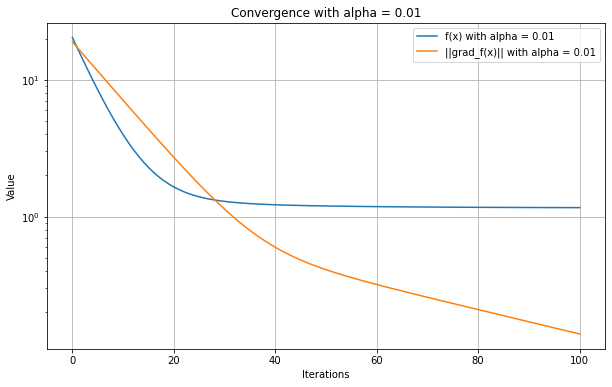

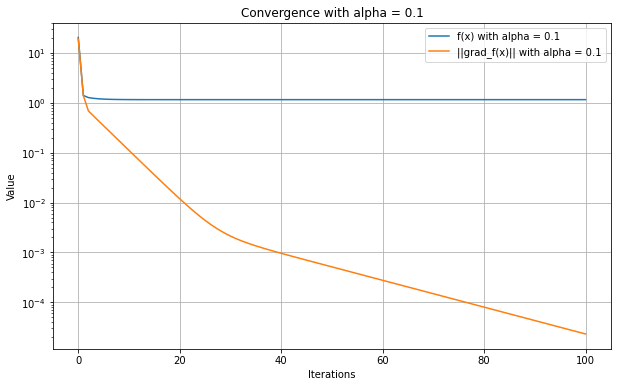

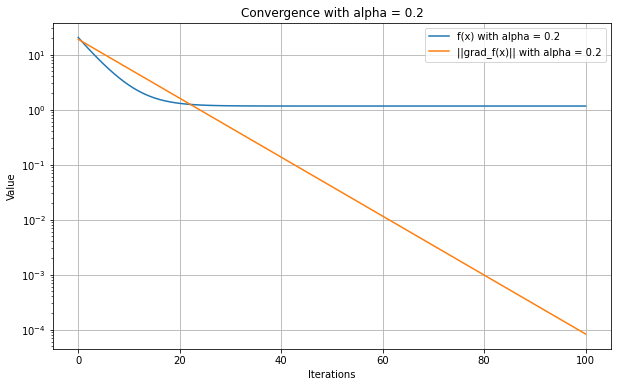

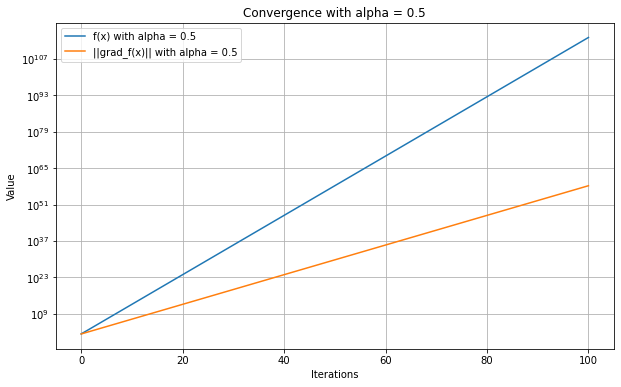

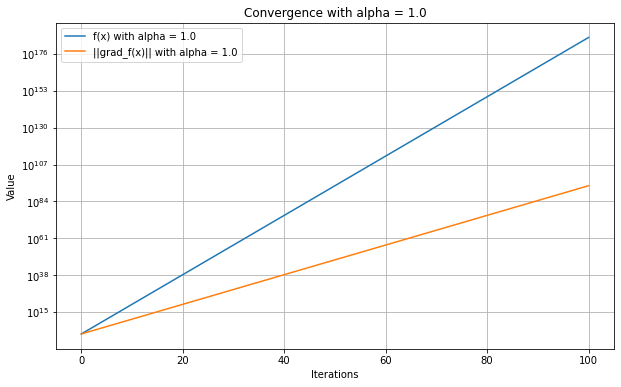

In [178]:
n = 5
A = generate_vandermonde_matrix(n)
x_true = np.ones(n)
b = A @ x_true
lam = 0.5
x0 = np.zeros(n)
kmax = 100
tolf = 1e-6
tolx = 1e-6
alphas = [0.01, 0.1, 0.2, 0.5, 1.0]

results_nobacktracking = {}
for alpha in alphas:
    results_nobacktracking[alpha] = gradient_descent_fixalpha(lambda x: f4(x, A, b, lam), lambda x: grad_f4(x, A, b, lam), x0, kmax, tolf, tolx, alpha)

for alpha, result in results_nobacktracking.items():
    path, num_iterations, f_val, grads, err = result
    final_func_value = f_val[-1]
    final_grad_norm = np.linalg.norm(grads[-1])

    plt.figure(figsize=(10, 6))
    plt.semilogy(range(len(f_val)), f_val, label=f'f(x) with alpha = {alpha}')
    plt.semilogy(range(len(err)), err, label=f'||grad_f(x)|| with alpha = {alpha}')
    plt.xlabel('Iterations')
    plt.ylabel('Value')
    plt.title(f'Convergence with alpha = {alpha}')
    plt.legend()
    plt.grid(True)
    plt.show()

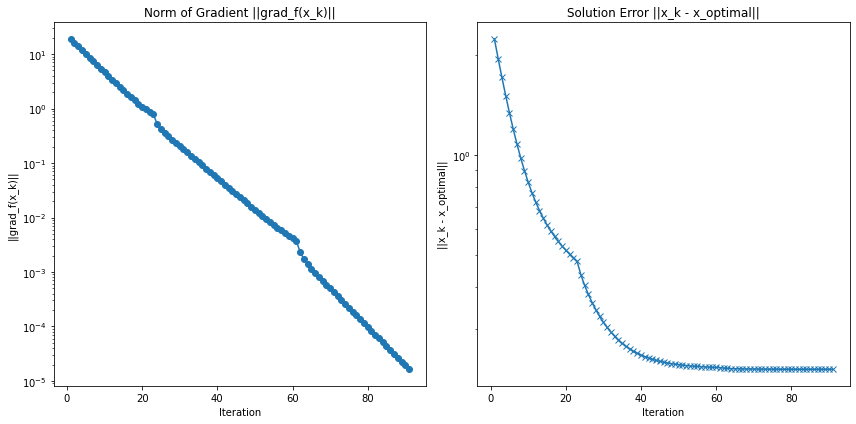

In [179]:
n = 5
A = generate_vandermonde_matrix(n)
x_true = np.ones(n)  
b = A @ x_true
lam = 0.5 
x0 = np.zeros(n)  
kmax = 100
tolf = 1e-6 
tolx = 1e-6  
path, num_iterations, f_val, grads, err = gradient_descent(lambda x: f4(x, A, b, lam), lambda x: grad_f4(x, A, b, lam),x0, kmax, tolf, tolx)
solution_errors = [np.linalg.norm(x_k - x_true) for x_k in path]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.semilogy(range(1, len(grads) + 1), err, marker='o')
plt.title('Norm of Gradient ||grad_f(x_k)||')
plt.xlabel('Iteration')
plt.ylabel('||grad_f(x_k)||')

plt.subplot(1, 2, 2)
plt.semilogy(range(1, len(solution_errors) + 1), solution_errors, marker='x')
plt.title('Solution Error ||x_k - x_optimal||')
plt.xlabel('Iteration')
plt.ylabel('||x_k - x_optimal||')

plt.tight_layout()
plt.show()


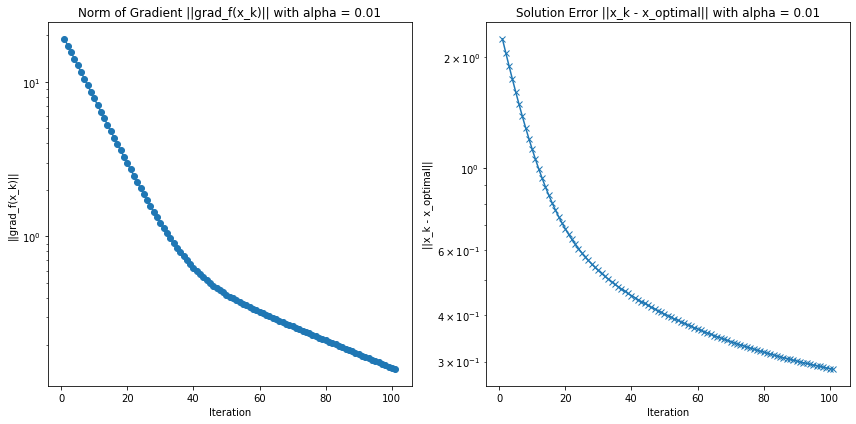

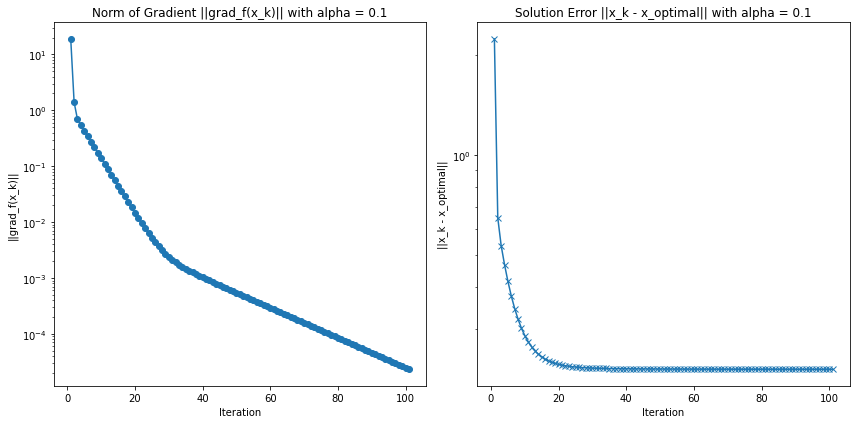

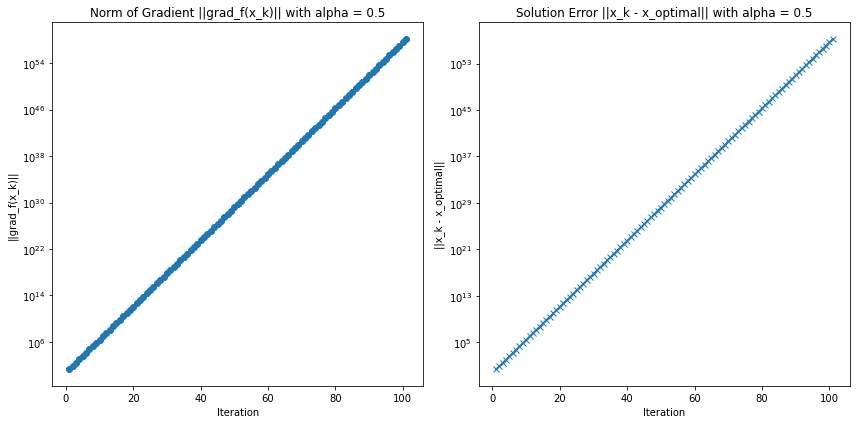

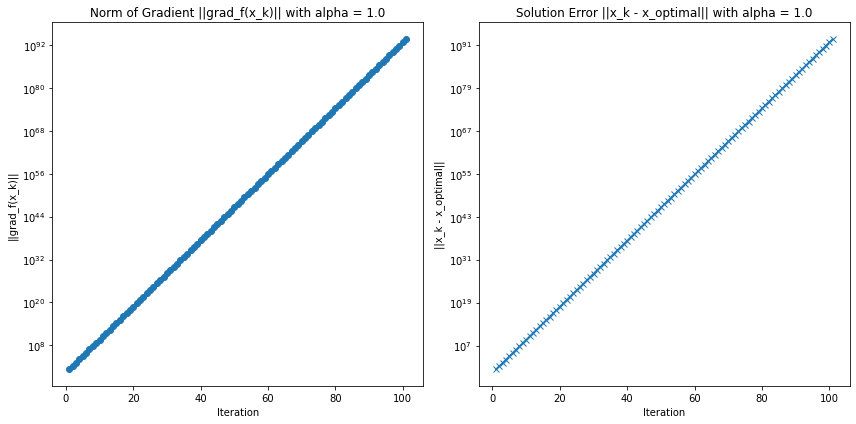

In [180]:
n = 5
lam = 0.5
A = generate_vandermonde_matrix(n)
x_true = np.ones(n)
b = A @ x_true
x0 = np.zeros(n)
kmax = 100
tolf = 1e-6
tolx = 1e-6
alphas = [0.01, 0.1, 0.5, 1.0]

results_nobacktracking = {}
for alpha in alphas:
    results_nobacktracking[alpha] = gradient_descent_fixalpha(lambda x: f4(x, A, b, lam), lambda x: grad_f4(x, A, b, lam), x0, kmax, tolf, tolx, alpha)

for alpha, result in results_nobacktracking.items():
    path, num_iterations, f_val, grads, err = result
    solution_errors = [np.linalg.norm(x_k - x_true) for x_k in path]

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.semilogy(range(1, len(grads) + 1), err, marker='o')
    plt.title(f'Norm of Gradient ||grad_f(x_k)|| with alpha = {alpha}')
    plt.xlabel('Iteration')
    plt.ylabel('||grad_f(x_k)||')

    plt.subplot(1, 2, 2)
    plt.semilogy(range(1, len(solution_errors) + 1), solution_errors, marker='x')
    plt.title(f'Solution Error ||x_k - x_optimal|| with alpha = {alpha}')
    plt.xlabel('Iteration')
    plt.ylabel('||x_k - x_optimal||')

    plt.tight_layout()
    plt.show()

<ipython-input-181-b33348b6ff1f>:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 1)
<ipython-input-181-b33348b6ff1f>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 2, 2)
<ipython-input-181-b33348b6ff1f>:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created

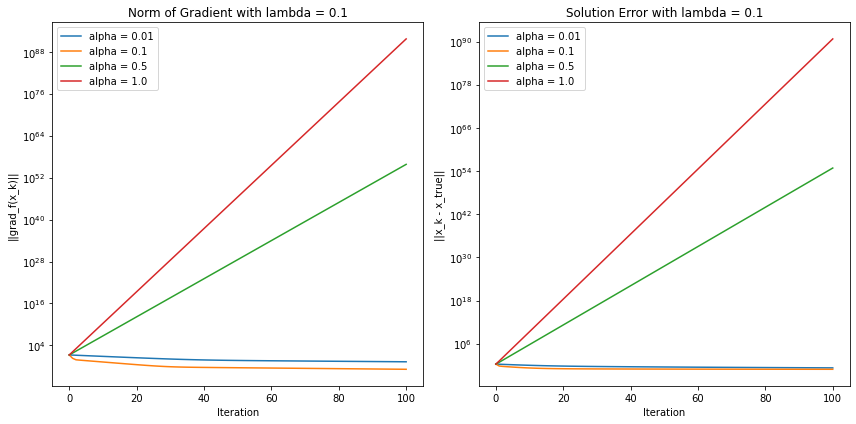

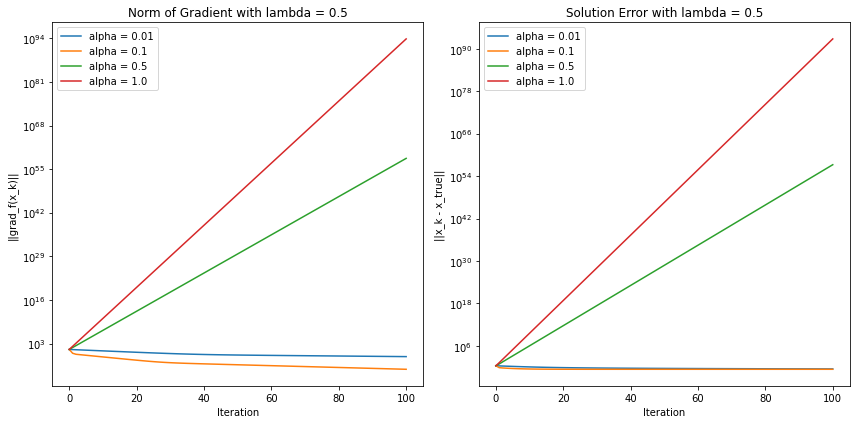

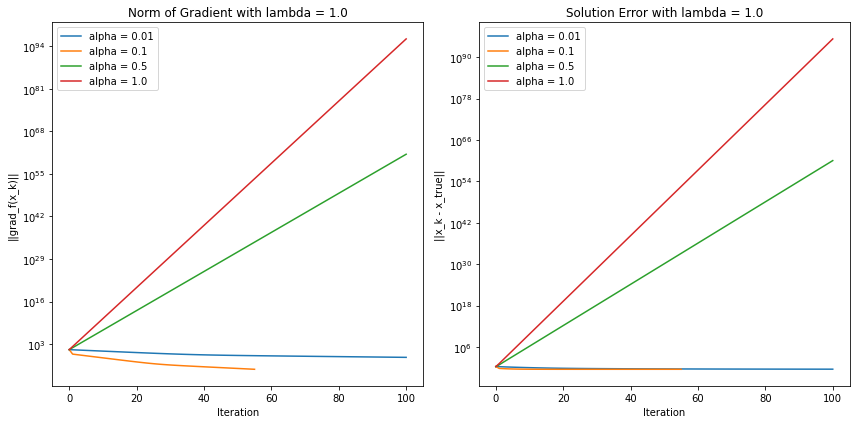

In [181]:
n = 5
A = generate_vandermonde_matrix(n)
x_true = np.ones(n)
b = A @ x_true
x0 = np.zeros(n)
kmax = 100
tolf = 1e-6
tolx = 1e-6
alphas = [0.01, 0.1, 0.5, 1.0]
lambda_values = [0.1, 0.5, 1.0]  # Diversi valori di lambda

for lam in lambda_values:
    plt.figure(figsize=(12, 6))

    for alpha in alphas:
        path, num_iterations, f_val, grads, err = gradient_descent_fixalpha(lambda x: f4(x, A, b, lam), lambda x: grad_f4(x, A, b, lam), x0, kmax, tolf, tolx, alpha)
        
        solution_errors = [np.linalg.norm(x_k - x_true) for x_k in path]

        plt.subplot(1, 2, 1)
        plt.semilogy(range(len(err)),err, label=f'alpha = {alpha}')
        
        plt.subplot(1, 2, 2)
        plt.semilogy(range(len(solution_errors)),solution_errors, label=f'alpha = {alpha}')

    plt.subplot(1, 2, 1)
    plt.title(f'Norm of Gradient with lambda = {lam}')
    plt.xlabel('Iteration')
    plt.ylabel('||grad_f(x_k)||')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.title(f'Solution Error with lambda = {lam}')
    plt.xlabel('Iteration')
    plt.ylabel('||x_k - x_true||')
    plt.legend()

    plt.tight_layout()
    plt.show()

# lamda to have a smooth solution and reduce overfitting 

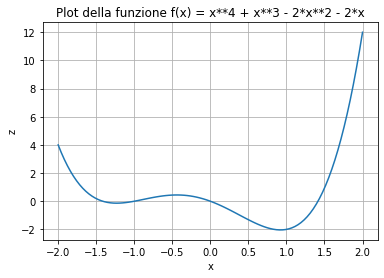

In [182]:
# 5 function 
x = np.linspace(-2, 2, 100)
z = x**4 + x**3 - 2*x**2 - 2*x

plt.plot(x,z)
plt.xlabel('x')
plt.ylabel('z')
plt.title('Plot della funzione f(x) = x**4 + x**3 - 2*x**2 - 2*x')
plt.grid()
plt.show()

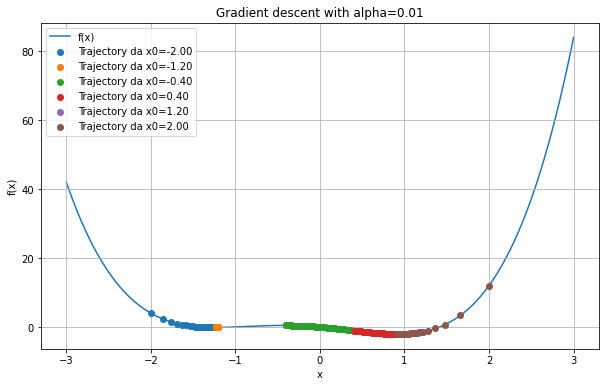

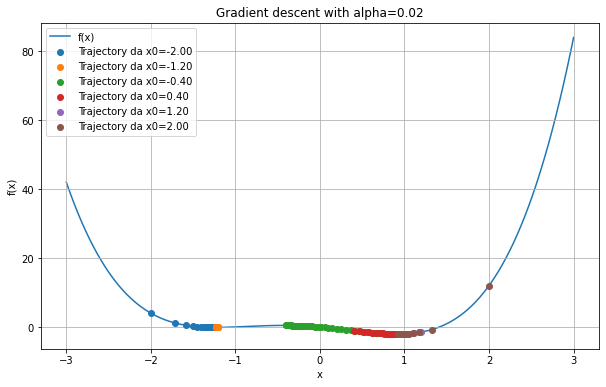

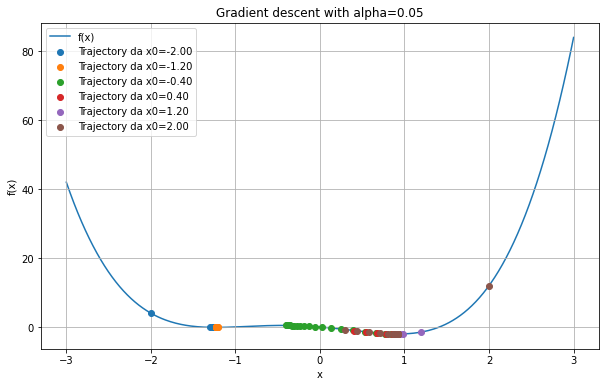

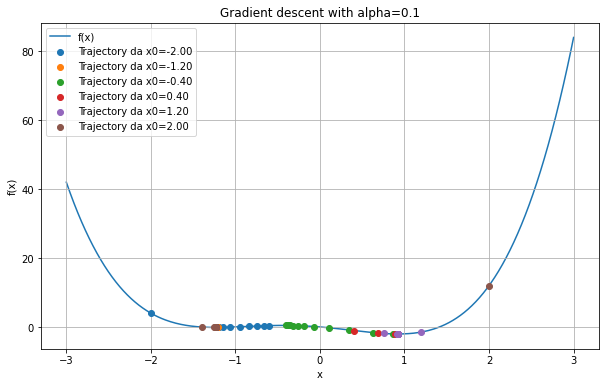

In [191]:
def f5(x):
    return x**4 + x**3 - 2*x**2 - 2*x

def grad_f5(x):
    return 4*x**3 + 3*x**2 - 4*x - 2

def gradient_descent_one(f, grad_f, x0, alpha, max_iters, tol):
    x = x0
    trajectory = [x]
    for i in range(max_iters):
        grad = grad_f(x)
        x = x - alpha * grad
        trajectory.append(x)

        if np.linalg.norm(grad) < tol:
            break

    return x, f(x), trajectory

max_iters = 10000
tol = 1e-6
alphas = [0.01, 0.02, 0.05, 0.1]  
starting_points = np.linspace(-2, 2, 6)

x_vals = np.linspace(-3, 3, 400)
y_vals = f5(x_vals)

for alpha in alphas:
    plt.figure(figsize=(10, 6))
    plt.plot(x_vals, y_vals, label='f(x)', zorder=1)
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(f'Gradient descent with alpha={alpha}')
    plt.grid(True)

    for x0 in starting_points:
        min_x, min_f, trajectory = gradient_descent_one(f5, grad_f5, x0, alpha, max_iters, tol)
        plt.scatter(trajectory, [f5(x) for x in trajectory], label=f'Trajectory da x0={x0:.2f}', zorder=2)
    
    plt.legend()
    plt.show()


<ipython-input-191-95a6ad315307>:5: RuntimeWarning: overflow encountered in double_scalars
  return 4*x**3 + 3*x**2 - 4*x - 2
<ipython-input-191-95a6ad315307>:5: RuntimeWarning: invalid value encountered in double_scalars
  return 4*x**3 + 3*x**2 - 4*x - 2


The global minimum found is at x = 0.9222247959397557 with a function value of -2.037748041495885
The gradient value at that point is grad_f = -2.0297506253541542e-07.


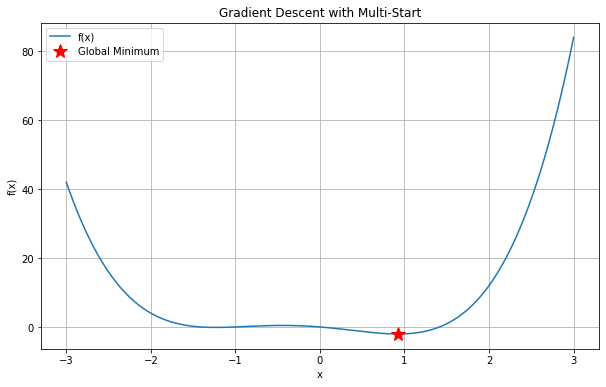

In [192]:
def gradient_descent_one(f, grad_f, x0, alpha, max_iters, tol):
    x = x0
    trajectory = [x]
    grad_history = [] 
    for i in range(max_iters):
        grad = grad_f(x)
        grad_history.append(grad) 
        x = x - alpha * grad
        trajectory.append(x)

        if np.linalg.norm(grad) < tol:
            break
        
    return x, f(x), trajectory, grad_history

max_iters = 10000
tol = 1e-6
alphas = [0.01, 0.02, 0.05, 0.1]  

starting_points = np.linspace(-3, 3, 20)
all_min = []

for alpha in alphas:
    for x0 in starting_points:
        min_x, min_f, _, grad_history = gradient_descent_one(f5, grad_f5, x0, alpha, max_iters, tol)
        all_min.append((min_x, min_f, grad_history[-1]))

global_minimum = min(all_min, key=lambda x: x[1])

print(f"The global minimum found is at x = {global_minimum[0]} with a function value of {global_minimum[1]}")
print(f"The gradient value at that point is grad_f = {global_minimum[2]}.")

x_vals = np.linspace(-3, 3, 400)
y_vals = f5(x_vals)

plt.figure(figsize=(10, 6))
plt.plot(x_vals, y_vals, label='f(x)')
plt.plot(global_minimum[0], global_minimum[1], 'r*', markersize=15, label='Global Minimum')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gradient Descent with Multi-Start')
plt.legend()
plt.grid(True)
plt.show()
